In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# Importing the dataset
df=pd.read_csv('/content/electronics.csv')

# list of first five rows

df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [ ]:
# list of last five row
df.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [ ]:
# shape

df.shape

(1292954, 10)

In [ ]:
# It is also a good practice to know the columns and their corresponding data types
# along with finding whether they contain null values or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [ ]:
from datetime  import datetime
pd.to_datetime(df['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [ ]:
# We can also see that the column Product ID is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

df['brand'] = df['brand'].astype(str)

In [ ]:
df['category']=df['category'].astype(str)
df['rating']=df['rating'].astype(float)
df['user_id']=df['user_id'].astype(str)
df['item_id']=df['item_id'].astype(str)
df['brand'] = df['brand'].astype(str)

In [ ]:
df.describe()

,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.014977e+03,1.747587e-01
std,1.379732e+00,2.117867e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.014000e+03,0.000000e+00
50%,5.000000e+00,2.015000e+03,0.000000e+00
75%,5.000000e+00,2.016000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


In [ ]:
# the statistical summary of the dataset gives us the following information:

# 1. The mean rating is 4.2.

# 2. The minimum rating is 1.

# 3. The maximum rating is 5.

# 4. The standard deviation of the ratings is 1.1.

# 5. The 25th percentile of the ratings is 4.

# 6. The 50th percentile of the ratings is 5.

# 7. The 75th percentile of the ratings is 5.

In [ ]:
df.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
split               3
dtype: int64

In [ ]:
df.duplicated().sum()



0

In [ ]:
df.rating.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
split         0
dtype: int64

<Axes: xlabel='rating', ylabel='count'>

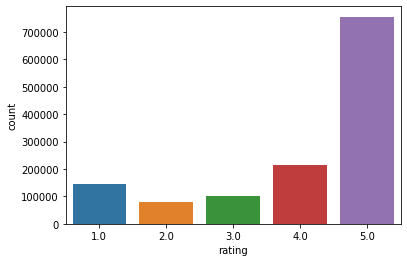

In [ ]:
sns.countplot(x='rating',data=df)

<Axes: xlabel='year'>

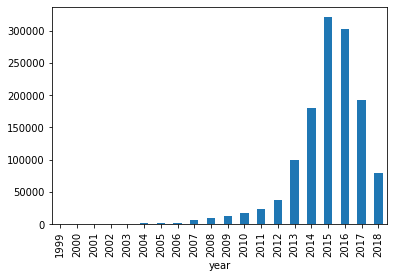

In [ ]:
# what was the best year of sales
df['year']=pd.DatetimeIndex(df['timestamp']).year
df.groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='brand'>

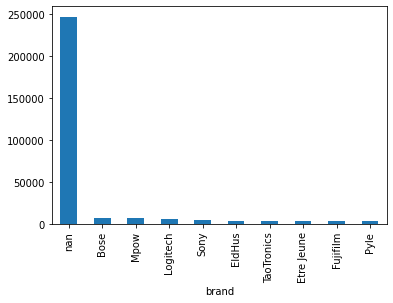

In [ ]:
# what brand sold the most in 2015
df_2015=df[df['year']==2015]
df_2015.groupby('brand')['rating'].count().sort_values(ascending =False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

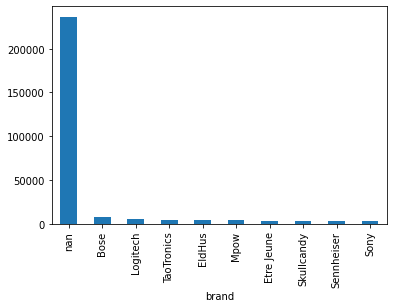

In [ ]:
# what product sold the most in 2016
df[df['year']==2016].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

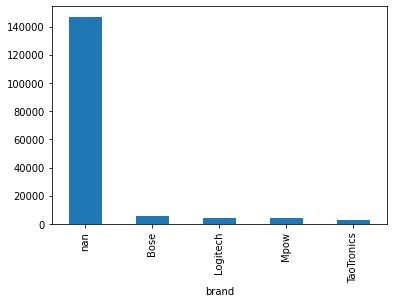

In [ ]:
df[df['year']==2017].groupby('brand')['rating'].count().sort_values(ascending=False).head().plot(kind='bar')

<Axes: xlabel='year'>

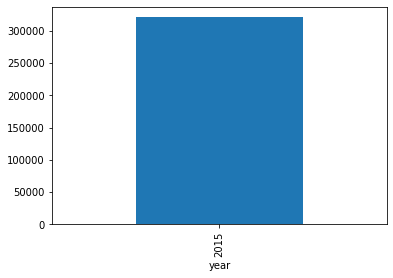

In [ ]:
# How much was made in sales in the year 2015
df[df['year']==2015].groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='month'>

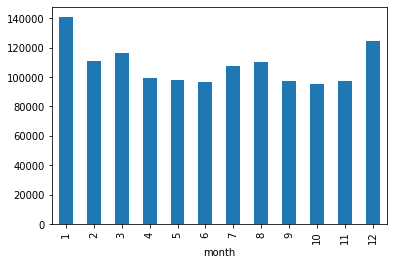

In [ ]:
#we will see the best month
df['month']=pd.DatetimeIndex(df['timestamp']).month
df.groupby('month')['rating'].count().plot(kind='bar')

<Axes: xlabel='brand'>

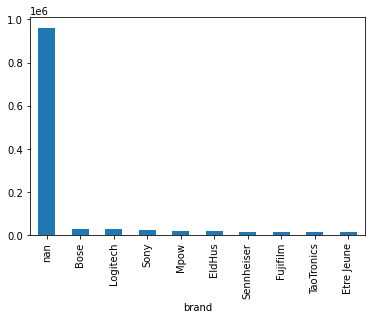

In [ ]:
# The month of January had the best sales.
# What product by brand name sold the most?
df.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='category'>

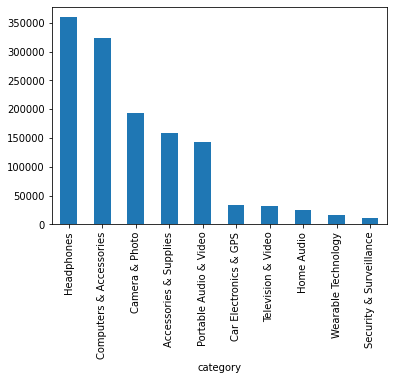

In [ ]:
df.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

In [ ]:
# We can see that the category of Headphones sold the most.

# computers and accesories were sold the second most

# camera & photo sold the third most followed by Accesories and supplies

# the least sold category was Security and Surveillance

<Axes: xlabel='brand'>

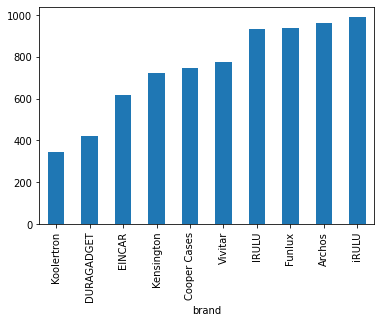

In [ ]:
#the product sold least
df.groupby('brand')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

In [ ]:
# We can see that the brand name of Koolertron sold the least followed closely with DURAGADGET.

<Axes: xlabel='category'>

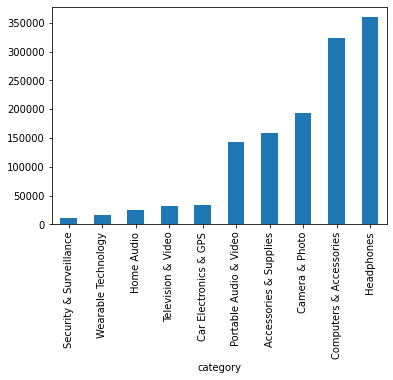

In [ ]:
#category wise  the least
df.groupby('category')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<Axes: ylabel='rating'>

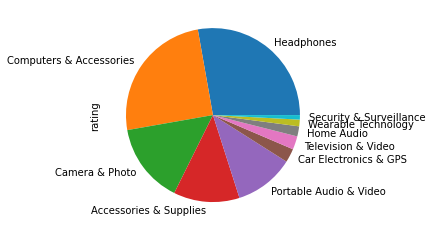

In [ ]:
#category percentage sales
df.groupby('category')['rating'].count().sort_values(ascending=False).head(12).plot(kind='pie')

<Axes: ylabel='rating'>

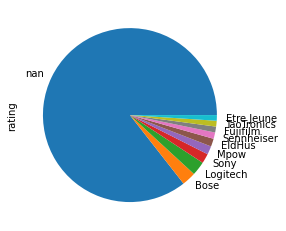

In [ ]:
df.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

In [ ]:
# We can see that the brand name of Bose and Logitech had the most sales
# conclusion of our analysis

In [ ]:


# We can see that the year 2015 had the best sales.

# The month of January had the best sales.

# We can see that the brands Bose and Logitech sold the most

# We can see that the category of Headphones sold the most.

# We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

# We can see that the category of Security and Surveillance sold the least.